# Detector Rates
The purpose of this notebook is to determine the relationship between bin values and actual energies.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
#Import data
dataNa22 = pd.read_csv ("data/Na22.csv")
dataDet5 = pd.read_csv ("data/Na22_det5.csv")
dataPuBe = pd.read_csv ("data/PuBe.csv")
thresholdNa22 = dataNa22.iloc[:,0]
thresholdDet5 = dataDet5.iloc[:,0]
thresholdPuBe = dataPuBe.iloc[:,0]
rateNa22 = dataNa22.iloc[:,1]
rateDet5 = dataDet5.iloc[:,1]
ratePuBe = dataPuBe.iloc[:,1]

#Cut an ill-behaved region
rateNa22 = rateNa22[thresholdNa22 > 220]
thresholdNa22 = thresholdNa22[thresholdNa22 > 220]
ratePuBe = ratePuBe[thresholdPuBe > 220]
thresholdPuBe = thresholdPuBe[thresholdPuBe > 220]
rateDet5 = rateDet5[thresholdDet5 > 220]
thresholdDet5 = thresholdDet5[thresholdDet5 > 220]

del dataNa22, dataDet5, dataPuBe

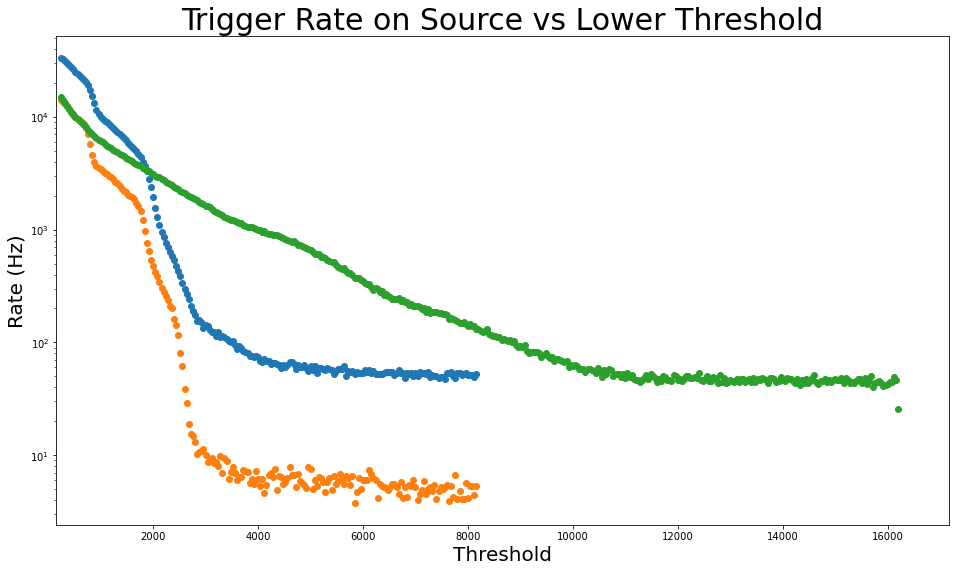

In [3]:
plt.figure(figsize=(16,9))

plt.scatter(thresholdNa22,rateNa22,label="Na22")
plt.scatter(thresholdDet5,rateDet5,label="Na22, Detector 5 only")
plt.scatter(thresholdPuBe,ratePuBe,label="PuBe")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Source vs Lower Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.yscale('log')
plt.xlim(150)
#plt.ylim(0)

plt.show()

In [4]:
diffsNa22 = np.zeros(len(thresholdNa22))
for i,n in enumerate(rateNa22):
    try:
        diffsNa22[i] = rateNa22[i-1] - n
    except KeyError:
        diffsNa22[i] = np.nan
diffsDet5 = np.zeros(len(thresholdDet5))
for i,n in enumerate(rateDet5):
    try:
        diffsDet5[i] = rateDet5[i-1] - n
    except KeyError:
        diffsDet5[i] = np.nan
diffsPuBe = np.zeros(len(thresholdPuBe))
for i,n in enumerate(ratePuBe):
    try:
        diffsPuBe[i] = ratePuBe[i-1] - n
    except KeyError:
        diffsPuBe[i] = np.nan

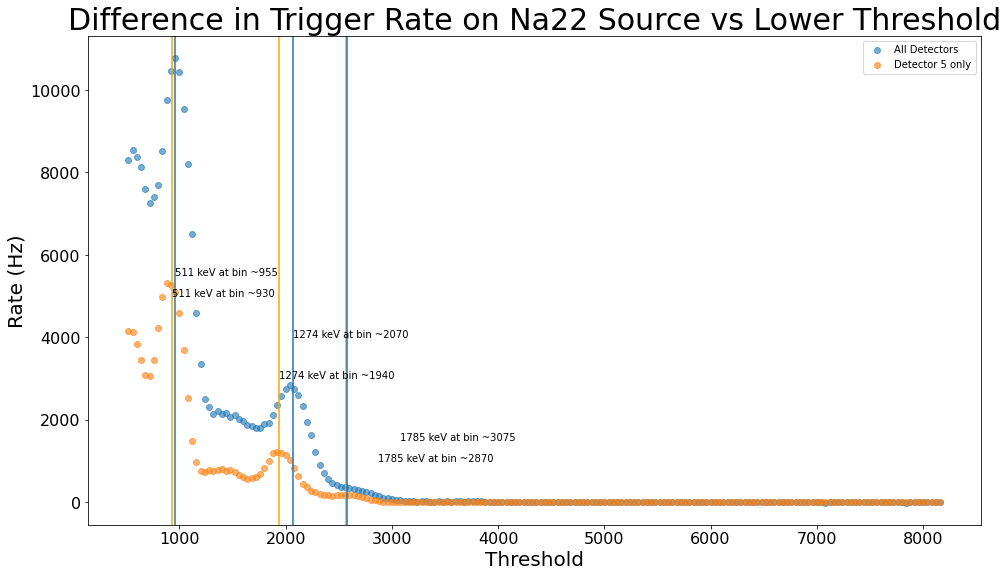

In [5]:
plt.figure(figsize=(16,9))

plt.scatter(thresholdNa22,diffsNa22,label="All Detectors",alpha=0.6)
plt.scatter(thresholdDet5,diffsDet5,label="Detector 5 only",alpha=0.6)
#plt.scatter(thresholdPuBe,diffsPuBe,label="PuBe")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Difference in Trigger Rate on Na22 Source vs Lower Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.xlim(5000)
#plt.ylim(0)

plt.axvline(955)
plt.text(955,5500,"511 keV at bin ~955")
plt.axvline(2070)
plt.text(2070,4000,"1274 keV at bin ~2070")
plt.axvline(930,color='orange')
plt.text(930,5000,"511 keV at bin ~930")
plt.axvline(1940,color='orange')
plt.text(1940,3000,"1274 keV at bin ~1940")
plt.axvline(2570,color='orange')
plt.text(2870,1000,"1785 keV at bin ~2870")
plt.axvline(2575)
plt.text(3075,1500,"1785 keV at bin ~3075")

#plt.axvline(2650)
#plt.text(2655,2000,"1785 keV at bin ~2650")

binpoints = [955,930,2070,1940]
energypoints = [511,511,1274,1274,1785,1785]

plt.legend()
plt.show()

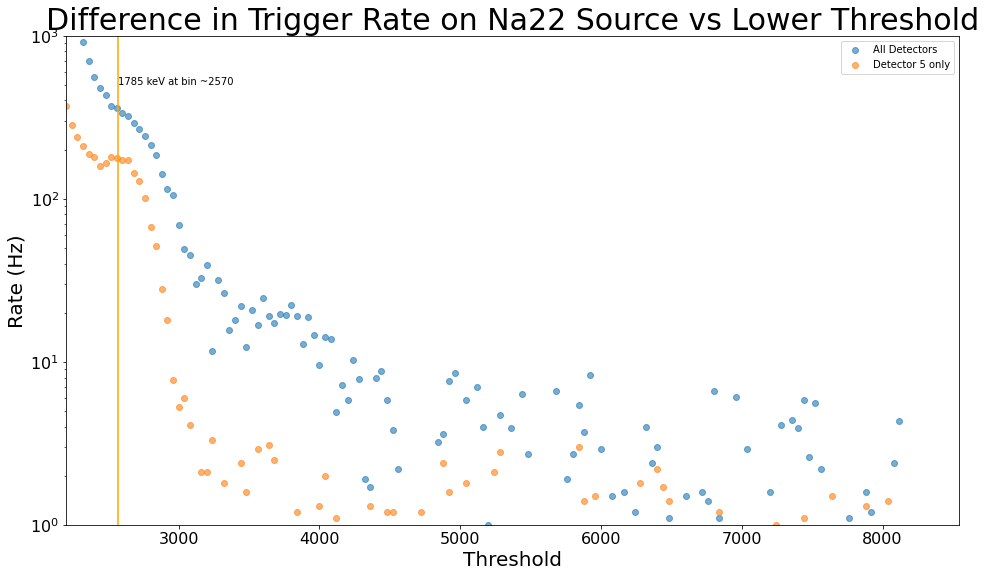

In [6]:
plt.figure(figsize=(16,9))

plt.scatter(thresholdNa22,diffsNa22,label="All Detectors",alpha=0.6)
plt.scatter(thresholdDet5,diffsDet5,label="Detector 5 only",alpha=0.6)
#plt.scatter(thresholdPuBe,diffsPuBe,label="PuBe")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Difference in Trigger Rate on Na22 Source vs Lower Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.xlim(2200)
plt.ylim(1,1000)
plt.yscale('log')

plt.axvline(2570,color='orange')
plt.text(2570,500,"1785 keV at bin ~2570")
#plt.axvline(2575)
#plt.text(3075,1500,"1785 keV at bin ~3075")

#plt.axvline(2650)
#plt.text(2655,2000,"1785 keV at bin ~2650")

binpoints = [955,930,2070,1940,2570]
energypoints = [511,511,1274,1274,1785]

plt.legend()
plt.show()

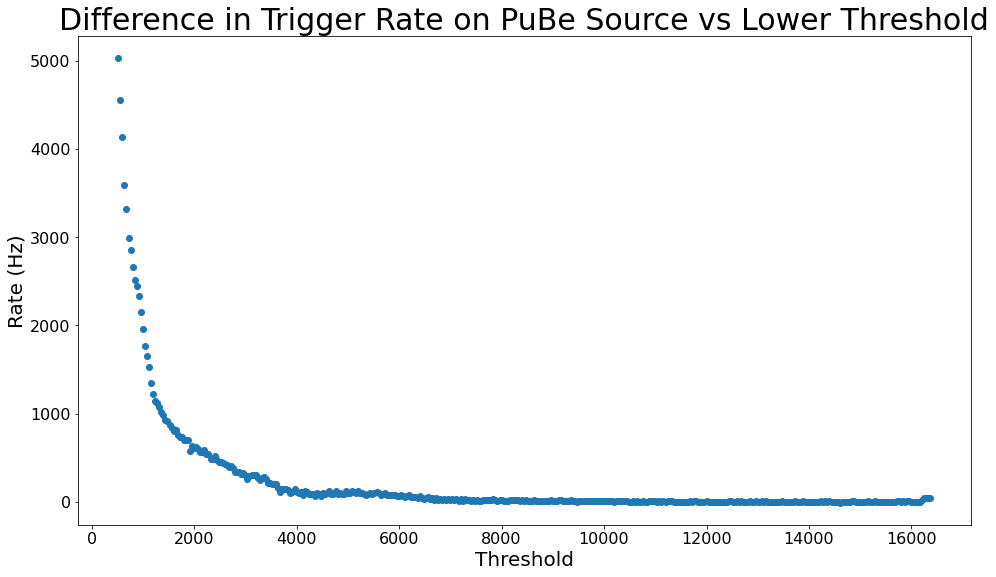

In [7]:
plt.figure(figsize=(16,9))

plt.scatter(thresholdPuBe,diffsPuBe)

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Difference in Trigger Rate on PuBe Source vs Lower Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.xlim(5000)
#plt.ylim(0,1000)

plt.show()

In [8]:
diffs2 = np.zeros(len(thresholdPuBe))
for i,n in enumerate(ratePuBe):
    try:
        diffs2[i] = ratePuBe[i-4] - n
    except KeyError:
        diffs2[i] = np.nan

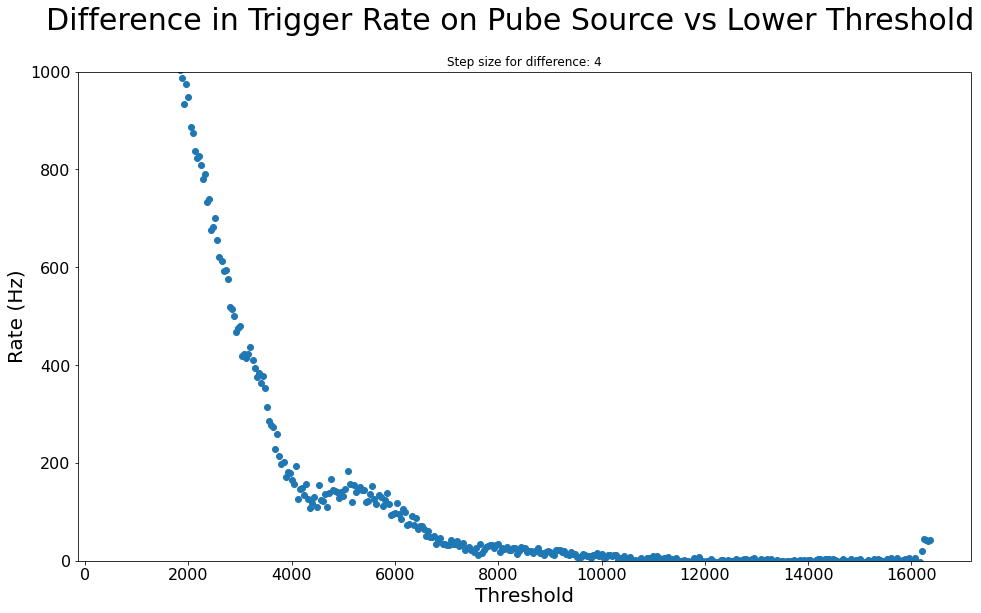

In [9]:
plt.figure(figsize=(16,9))

plt.scatter(thresholdPuBe,diffs2)

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Difference in Trigger Rate on Pube Source vs Lower Threshold",size=30)
plt.title("Step size for difference: 4")
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.xlim(5000)
plt.ylim(0,1000)

point = [880,511]
point2 = [1940,1274]
point3 = [2650, 1785]

plt.show()

## Fitting the Bin/Energy Relationship

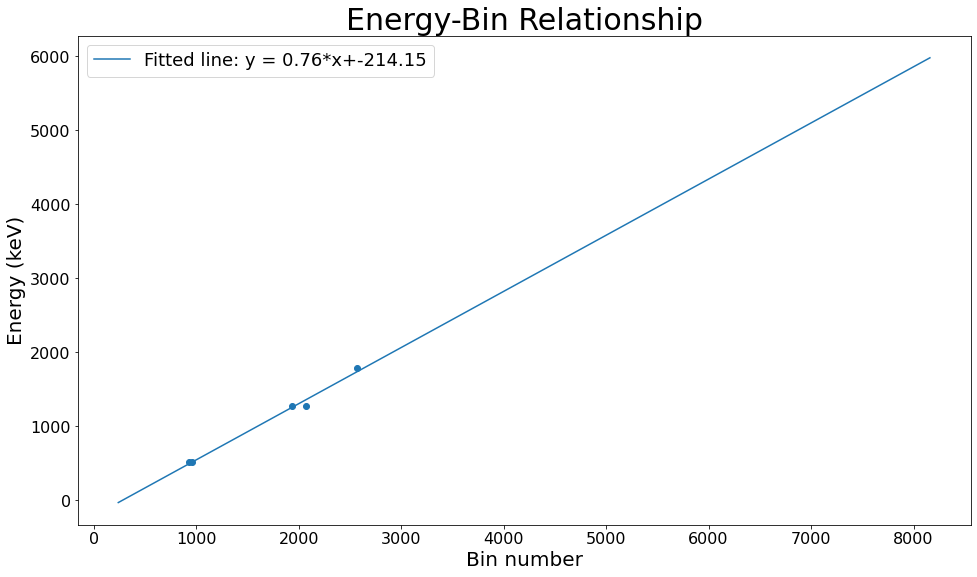

In [10]:
#Set up our model
def f(x,m,b):
    return m*x+b
l_model = lf.Model(f)
params = l_model.make_params(m=1,b=0) #Use our old 'fit' for inital guesses.

#Do the fit
l_fit = l_model.fit(energypoints,params,x=binpoints)
l_dict = l_fit.best_values
l_m = l_dict['m']
l_b = l_dict['b']
l_curve = f(thresholdNa22,l_m,l_b)

#plot it
plt.figure(figsize=(16,9))
plt.scatter(binpoints,energypoints)
plt.plot(thresholdNa22,l_curve,label="Fitted line: y = {:.2f}*x+{:.2f}".format(l_m,l_b))
plt.title("Energy-Bin Relationship",fontsize=30)
plt.xlabel("Bin number",fontsize=20)
plt.ylabel("Energy (keV)",fontsize=20)
plt.legend(fontsize=18)
plt.show()

l_fit

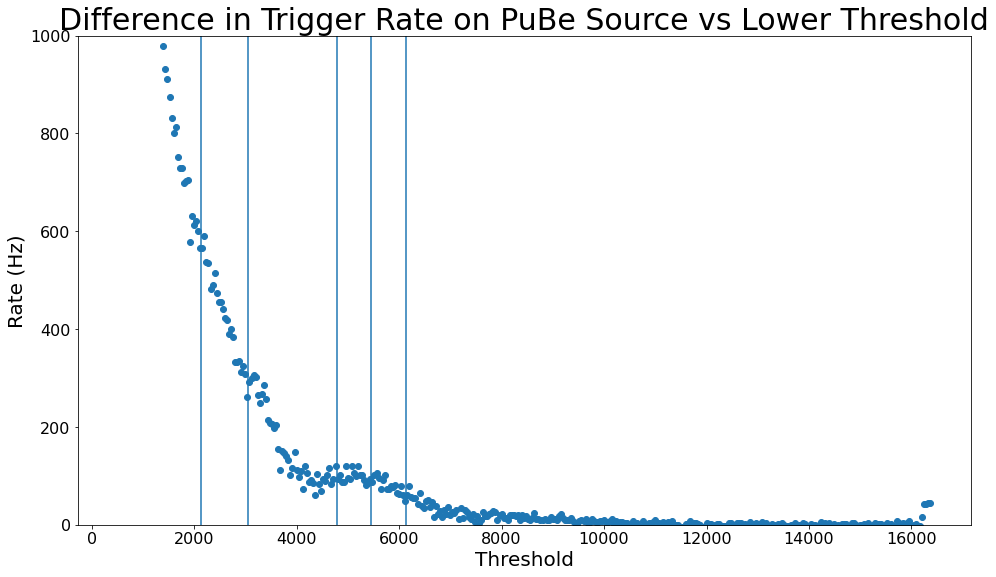

In [12]:
plt.figure(figsize=(16,9))

def inv(e): #inverse linear function
    return (e - l_b)/l_m

plt.scatter(thresholdPuBe,diffsPuBe)

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Difference in Trigger Rate on PuBe Source vs Lower Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.xlim(5000)
plt.ylim(0,1000)

plt.axvline(inv(1400))
plt.axvline(inv(2100))
plt.axvline(inv(4438-511*2))
plt.axvline(inv(4438-511))
plt.axvline(inv(4438))


plt.show()